# Assignment 2 
### Shaonan LIN a1881982


## A. Tasks as specified for your team structure

**One headings for each task.**

### 1. Read and pre-process dataset

In [ ]:
# pip install chardet   

In [1]:
import pandas as pd
import random
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import chardet
import re

In [2]:
# I need to use chardet to detect the encoding of the dataset file
with open('news_dataset.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']
# read the data   
data = pd.read_csv('news_dataset.csv',encoding=encoding)

# randomly select 100 articles from the dataset
sample_indices = random.sample(range(len(data)), 100)
df = data.iloc[sample_indices]    #the sampled dataset


In [3]:
df

,id,author,date,year,month,topic,article
839,18284,Simon Romero and Daniel Politi,3/03/2017,2017,3,politics,BUENOS AIRES ? Argentina is so used to cele...
733,18159,Melena Ryzik,3/02/2017,2017,2,entertainment,"It?s almost a coronation: Every year, the Sund..."
273,17607,Eric Lichtblau and Jess Bidgood,13/01/2017,2017,1,crime,BALTIMORE ? Nearly two years after the deat...
805,18245,Russ Buettner and Noam Scheiber,4/02/2017,2017,2,business,Decades before President Trump nominated him t...
101,17410,Michael D. Shear and David E. Sanger,7/01/2017,2017,1,politics,WASHINGTON ? President Vladimir V. Putin of...
...,...,...,...,...,...,...,...
815,18257,Jon Pareles,3/02/2017,2017,2,entertainment,Where did all the rocker guys go? In recent ye...
357,17711,Charlie Savage,21/01/2017,2017,1,politics,WASHINGTON ? President Obama on Tuesday com...
258,17591,"Scott Shane, Nicholas Confessore and Matthew R...",6/02/2017,2017,2,politics,"WASHINGTON ? Seven months ago, a respected ..."
356,17709,Patrick Phillips,13/01/2017,2017,1,crime,TEARS WE CANNOT STOPA Sermon to White AmericaB...


In [78]:
df.to_csv('sample_100.csv', index=False)   #for me to generate test question

### 2. Coreference Resolution utility

In [4]:
from collections import defaultdict

In [35]:
# preprocessing user's question

def preprocess_question(question):
    # Replace question marks with apostrophes
    question = question.replace('?', "'")
    
    # Tokenize the question into words
    words = word_tokenize(question.lower())
    
    
    return words

In [36]:
# Assuming you have a function to get the user's question
def get_user_question():
    question = input("Please enter your question: ")
    return question

# Process the user's question
user_question = get_user_question()
preprocessed_question = preprocess_question(user_question)

print("Original question:", user_question)
print("Preprocessed question:", preprocessed_question)

Original question: what does president obama do on tuesday
Preprocessed question: ['what', 'does', 'president', 'obama', 'do', 'on', 'tuesday']


In [20]:
import spacy

def preprocess_text(text):
    # Replace question marks with apostrophes
    text = text.replace('?', "'")
    
    nlp = spacy.load("en_core_web_trf")
    
    # Process the text
    doc = nlp(text)
    
    # Tokenize the resolved text into sentences and words
    sentences = [sent.text for sent in doc.sents]
    
    
    
    return sentences


In [21]:
df['preprocessed'] = df['article'].apply(preprocess_text)

C:\Users\stell\AppData\Local\Temp\ipykernel_2868\2594893166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed'] = df['article'].apply(preprocess_text)


In [22]:
df

,id,author,date,year,month,topic,article,preprocessed
839,18284,Simon Romero and Daniel Politi,3/03/2017,2017,3,politics,BUENOS AIRES ? Argentina is so used to cele...,"[BUENOS AIRES, ', , Argentina is so used to..."
733,18159,Melena Ryzik,3/02/2017,2017,2,entertainment,"It?s almost a coronation: Every year, the Sund...","[It's almost a coronation: Every year, the Sun..."
273,17607,Eric Lichtblau and Jess Bidgood,13/01/2017,2017,1,crime,BALTIMORE ? Nearly two years after the deat...,"[BALTIMORE ', Nearly two years after the de..."
805,18245,Russ Buettner and Noam Scheiber,4/02/2017,2017,2,business,Decades before President Trump nominated him t...,[Decades before President Trump nominated him ...
101,17410,Michael D. Shear and David E. Sanger,7/01/2017,2017,1,politics,WASHINGTON ? President Vladimir V. Putin of...,[WASHINGTON ' President Vladimir V. Putin o...
...,...,...,...,...,...,...,...,...
815,18257,Jon Pareles,3/02/2017,2017,2,entertainment,Where did all the rocker guys go? In recent ye...,"[Where did all the rocker guys go', In recent ..."
357,17711,Charlie Savage,21/01/2017,2017,1,politics,WASHINGTON ? President Obama on Tuesday com...,[WASHINGTON ' President Obama on Tuesday co...
258,17591,"Scott Shane, Nicholas Confessore and Matthew R...",6/02/2017,2017,2,politics,"WASHINGTON ? Seven months ago, a respected ...","[WASHINGTON ' Seven months ago, a respected..."
356,17709,Patrick Phillips,13/01/2017,2017,1,crime,TEARS WE CANNOT STOPA Sermon to White AmericaB...,[TEARS WE CANNOT STOPA Sermon to White America...


the following part of creat inverted index may not be use

In [62]:
# create an inverted index
def create_inverted_index(df):
    inverted_index = defaultdict(lambda: defaultdict(list))
    
    for row in df.iterrows():
        article_id = row['id']
        preprocessed_content = row['preprocessed']
        # iterate with each sentence
        for sentence_id, sentence in enumerate(preprocessed_content):
            for word in sentence:
                inverted_index[article_id][word].append(sentence_id)
    return inverted_index
inverted_index = create_inverted_index(df)


Creating an inverted index is a fundamental concept in information retrieval systems. It allows for efficient searching and retrieval of documents based on the words they contain. The inverted index is a data structure that maps each word to the documents or locations where it appears. SEE REF:

Manning, C. D., Raghavan, P., & Schütze, H. (2008). Introduction to Information Retrieval. Cambridge University Press.
Chapter 1: Boolean retrieval
Section 1.2: A first take at building an inverted index

In [15]:
# now let's use the inverted index to find the sentences that contains the words from user's question
def retrieve_sentences(article_id, question, inverted_index, top): 
# the top parameter is for determining the top rank n relevant sentences for retrieving
    relevant_sentences = defaultdict(int)
    article_index = inverted_index.get(article_id)
    if article_index:
        for  word in question:
            if word in article_index:
                for sentence_id in article_index[word]:
                    relevant_sentences[sentence_id] += 1
                    # add the relevance score for each sentence
    # the above iteration helps us to create a dictionary called relevant_sentences that stores the relevance scores for each sentences that matches with the question
    sorted_sentences = sorted(relevant_sentences.items(), key=lambda x: x[1], reverse=True) #sort the sentences in descending order
    top_sentences = [sentence[0] for sentence in sorted_sentences[:top]]
    return top_sentences

In [16]:
# get article number from the user
def get_article_id():
    article_number = input("Please enter the article number: ")
    return int(article_number)

article_number = get_article_id()

top_sentences = retrieve_sentences(article_id=article_number, question=user_question, inverted_index=inverted_index, top=3)

for sentence_id in top_sentences:
    sentence = df.loc[df['id'] == article_number, 'preprocessed'].iloc[0][sentence_id]
    print(f"Article ID: {article_number}, Sentence ID: {sentence_id}")
    print(" ".join(sentence))
    print()

Article ID: 18284, Sentence ID: 55
but maria alejandra alviarez , 39 , a nurse from venezuela who moved here a year ago and works in a health food store , said argentina had been 'too free and open ' before the decree .

Article ID: 18284, Sentence ID: 3
argentina is so used to celebrating immigration as a cornerstone of society that a saying ' to govern is to populate ' remains in use to this day .

Article ID: 18284, Sentence ID: 6
' a decree like this scares people , ' said arfang diedhiou , 33 , a senegalese immigrant who runs his own clothing store here in the capital , buenos aires .



### 3. Text Matching

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def text_matching(question, sentences):
    #convert text into TF-IDF vectors
    vectorizer = TfidfVectorizer()
    #combine the user's question and preprocessed sentence into a single corpus
    comb = [question] + sentences
    #fit and transform the corpus
    transf_matrix = vectorizer.fit_transform(comb)
    #calculate the cosine similarity between question and each sentence
    similarity_scores = cosine_similarity(transf_matrix[0:1], transf_matrix[1:])
    #find out the sentence that is most similar to the question
    most_similar_index = similarity_scores.argmax()
    most_similar_sentence = sentences[most_similar_index]
    confidence_score = similarity_scores[0, most_similar_index]
    return most_similar_sentence, confidence_score


In [74]:
# Assuming you have a function to get the user's question and article number
question = get_user_question()
article_number = get_article_id()

# Preprocess the article content
article_content = df.loc[df['id'] == article_number, 'article'].iloc[0]
preprocessed_sentences = preprocess_text(article_content)

# Find the most relevant sentence and its confidence score
most_relevant_sentence, confidence_score = text_matching(question, preprocessed_sentences)

print("Most relevant sentence:", most_relevant_sentence)
print("Confidence score:", confidence_score)

Most relevant sentence: 'Chelsea Manning is somebody who went through the military criminal justice process, was exposed to due process, was found guilty, was sentenced for her crimes, and she acknowledged wrongdoing,' he said.
Confidence score: 0.2739207435851098


### 4. Answer Extraction

In [40]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import torch

def extract_answer(question, sentence):
    # Load the pre-trained question-answering model and tokenizer
    model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"
    model = AutoModelForQuestionAnswering.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Tokenize the question and sentence
    inputs = tokenizer(question, sentence, return_tensors="pt")

    # Get the model outputs
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the start and end scores for the answer
    start_scores = outputs.start_logits
    end_scores = outputs.end_logits

    # Get the most likely start and end positions of the answer
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores) + 1

    # Extract the answer from the sentence
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][answer_start:answer_end]))

    return answer

In [68]:
# Assuming you have a function to get the user's question and article number
user_question = get_user_question()
article_number = get_article_id()

# Preprocess the article content
article_content = df.loc[df['id'] == article_number, 'article'].iloc[0]
preprocessed_sentences = preprocess_text(article_content)

# Find the most relevant sentence and its confidence score
most_relevant_sentence, confidence_score = text_matching(user_question, preprocessed_sentences)

# Extract the answer from the most relevant sentence
answer = extract_answer(user_question,most_relevant_sentence)

print("Most relevant sentence:", most_relevant_sentence)
print("Extracted answer:", answer)

Most relevant sentence: WASHINGTON  '   President Obama on Tuesday commuted all but four months of the remaining prison sentence of Chelsea Manning, the Army intelligence analyst convicted of a 2010 leak that revealed American military and diplomatic activities across the world, disrupted Mr. Obama's administration and brought global prominence to WikiLeaks, the recipient of those disclosures.
Extracted answer: the army intelligence analyst


### 5. Test Utility

In [75]:
# get article number from the user
def get_article_id():
    article_number = input("Please enter the article number: ")
    return int(article_number)

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Define the test utility function
def test_utility(article_numbers, test_questions):
    # Initialize variables
    true_labels = []
    predicted_labels = []
    em_count = 0

    for article_number in article_numbers:
        # Preprocess the article content
        article_content = df.loc[df['id'] == article_number, 'article'].iloc[0]
        preprocessed_sentences = preprocess_text(article_content)

        for question, expected_answer in test_questions:
            # Find the most relevant sentence and its confidence score
            most_relevant_sentence, _ = text_matching(question, preprocessed_sentences)

            # Extract the answer from the most relevant sentence
            predicted_answer = extract_answer(question, most_relevant_sentence)

            # Check for Exact Match (EM)
            em = 1 if expected_answer.lower() == predicted_answer.lower() else 0
            em_count += em

            # Compute F1 score
            predicted_labels.append(1 if expected_answer.lower() in predicted_answer.lower() or predicted_answer.lower() in expected_answer.lower() else 0)

        # Compute True labels for the entire article
        true_labels += [1]*len(test_questions)  # All questions should have a true label of 1

    # Calculate evaluation metrics
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    
    # Calculate Mean Average Precision (MAP)
    average_precision = average_precision_score(true_labels, predicted_labels)
    
    # Print evaluation metrics
    print(f"Exact Match (EM): {em_count}/{len(article_numbers)*len(test_questions)}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Mean Average Precision (MAP): {average_precision:.2f}")

    # Create a bar chart to visualize the evaluation metrics
    metrics = ['Precision', 'Recall', 'F1 Score', 'MAP']
    scores = [precision, recall, f1, average_precision]

    plt.figure(figsize=(10, 6))
    plt.bar(metrics, scores, color=['blue', 'green', 'red', 'purple'])
    plt.ylim(0, 1.0)
    plt.title("Evaluation Metrics")
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    for i, v in enumerate(scores):
        plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
    plt.show()

    return f1, average_precision

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score # type: ignore
import matplotlib.pyplot as plt

def test_utility(article_number, test_questions):
    # Preprocess the article content
    article_content = df.loc[df['id'] == article_number, 'article'].iloc[0]
    preprocessed_sentences = preprocess_text(article_content)

    # Initialize variables
    true_labels = []
    predicted_labels = []

    for question, expected_answer in test_questions:
        # Find the most relevant sentence and its confidence score
        most_relevant_sentence, _ = text_matching(question, preprocessed_sentences)

        # Extract the answer from the most relevant sentence
        predicted_answer = extract_answer(question, most_relevant_sentence)

        # Append true and predicted labels
        true_labels.append(1 if expected_answer.lower() in predicted_answer.lower() or predicted_answer.lower() in expected_answer.lower() else 0)
        predicted_labels.append(1 if predicted_answer else 0)

    # Calculate evaluation metrics
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    # Print evaluation metrics
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Create a bar chart to visualize the evaluation metrics
    metrics = ['Precision', 'Recall', 'F1 Score']
    scores = [precision, recall, f1]

    plt.figure(figsize=(8, 6))
    plt.bar(metrics, scores)
    plt.ylim(0, 1.0)
    plt.title(f"Evaluation Metrics for Article {article_number}")
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.show()

    return f1

Exact Match (EM): 2/81
Precision: 1.00
Recall: 0.11
F1 Score: 0.20
Mean Average Precision (MAP): 1.00


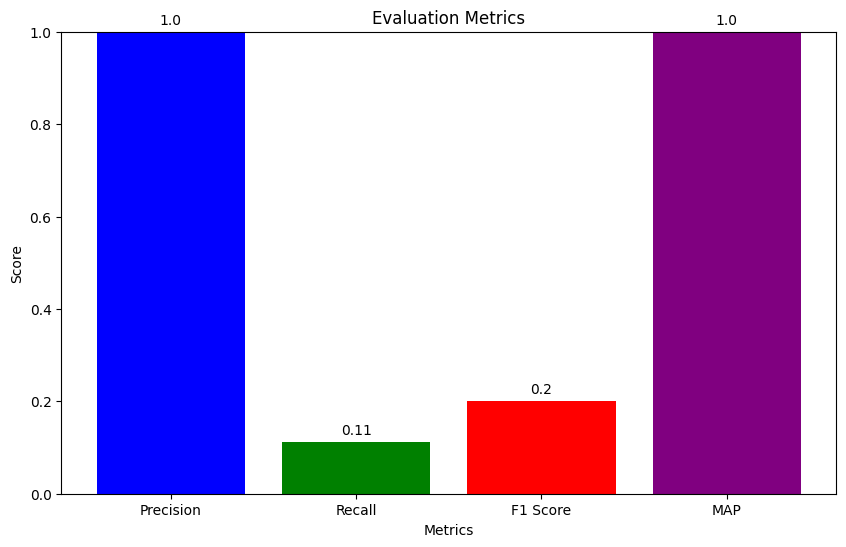

Overall F1 Score: 0.20
Overall Mean Average Precision (MAP): 1.00


In [81]:
#  test questions and expected answers
test_questions = [
    ('What is the saying related to immigration that remains in use in Argentina?','to govern is to populate'),
    ('What is the term used for the series of meetings with development executives and agents in Los Angeles that Sundance filmmakers often go on after the festival?','water bottle tour'),
    ('In 1983, who did Andrew Puzder work for in a Las Vegas courtroom regarding a case involving squandering union workers\'s pension funds?','Morris A. Shenker'),
    ('Why was Guadalupe Garcâ‰ a de Rayos deported from the United States?','stricter immigration policies under President Trump\'s administration'),
    ('Who is Seth A. Klarman?','A prominent value investor who runs Baupost Group'),
    ('What designation has been given to Hamas?','an Islamic militant group'),
    ('What is the name of the app reviewed by the travel writer?','OMG. I Can Meditate!'),
    ('What was the reason the appeals court disagreed with the Trump administration\'s argument to reject the lawsuit?','because of the impact the travel ban would have on public universities'),
    ('How did President Obama describe his efforts in January 2009 regarding neighborhoods that were suffering?','he would not describe as efforts to specifically help Black America')
]

article_numbers = [18284,18159,18245,18422,18376,17484,17908,18442,17648]

f1, map_score = test_utility(article_numbers, test_questions)

print(f"Overall F1 Score: {f1:.2f}")
print(f"Overall Mean Average Precision (MAP): {map_score:.2f}")
